<a href="https://colab.research.google.com/github/srbh0186/portfolio/blob/main/Crop_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Replace path as needed
data = pd.read_csv('/content/drive/MyDrive/Crop_recommendation.csv')

# Preview data
print(data.head())


    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [ ]:
# Return information about the datatype,
# NULL type of the columns of CSV file
#Purpose of data.info() It shows:
#Number of entries (rows)
#Index range
#Column names
#Non-null count per column
#Data type (Dtype) of each column
#Memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


1. N – Nitrogen
Purpose: Vital for leaf growth, chlorophyll production, and photosynthesis.

Impact: Promotes lush, green foliage and vegetative growth.

Deficiency Symptoms: Yellowing leaves, stunted growth.
2. P – Phosphorus
Purpose: Crucial for root development, flowering, and fruit/seed production.

Impact: Encourages strong root systems and improves flower and fruit yields.

Deficiency Symptoms: Poor root growth, purplish or dark foliage.

🧪 3. K – Potassium
Purpose: Supports overall plant health, disease resistance, and water regulation.

Impact: Enhances drought tolerance, strengthens stems, improves fruit quality.

Deficiency Symptoms: Weak stems, leaf edge burn, poor fruit development.

In [ ]:
# describe
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


**25%**
For a sorted list of numbers:

Arrange the values in ascending order.

Find the value below which 25% of the data fall.

📌 Example:
Say we have this dataset:
[10, 20, 30, 40, 50, 60, 70, 80]
(8 values total)

To find the 25th percentile (Q1):

Position = 25% of (n + 1) = 0.25 × (8 + 1) = 2.25

So Q1 is between the 2nd and 3rd values → 20 and 30

Using interpolation:
Q1 = 20 + 0.25 × (30 - 20) = 20 + 2.5 = 22.5

🧠 Why Percentiles Matter
Q1 (25%) = boundary of the lowest 25%

Q2 (50%) = median

Q3 (75%) = boundary of the highest 25%

They help in:

Understanding data spread

Identifying outliers using the IQR method

Feature scaling or normalization in ML



In [ ]:
#The command data.isnull().sum() in Pandas is used to check for missing values (null values) in each column of your DataFrame.
data.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [ ]:
# Return the number of unique labels
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
# Return the count of each unique label
data['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


Encoding:

In [ ]:
#to convert categorical text labels (crop names) into numerical values that machine learning models can understand and process.
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
data['crop_num']=  data['label'].map(crop_dict)

In [ ]:
data

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22


In [ ]:
#now just drop the lable column

data.drop(['label'],axis=1,inplace=True)
data.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


Explanation of Parameters
data: your DataFrame.

.drop(['label']): tells pandas to drop the column named 'label'.

axis=1: indicates you are dropping a column (not a row).
(axis=0 would mean drop a row)

inplace=True: applies the change directly to data without needing to assign it back.

<ipython-input-12-0aa2732421b3>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feat], color='greenyellow')
<ipython-input-12-0aa2732421b3>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feat], color='greenyellow')
<ipython-input-12-0aa2732421b3>:11: UserWarning: 

`distplot` is a

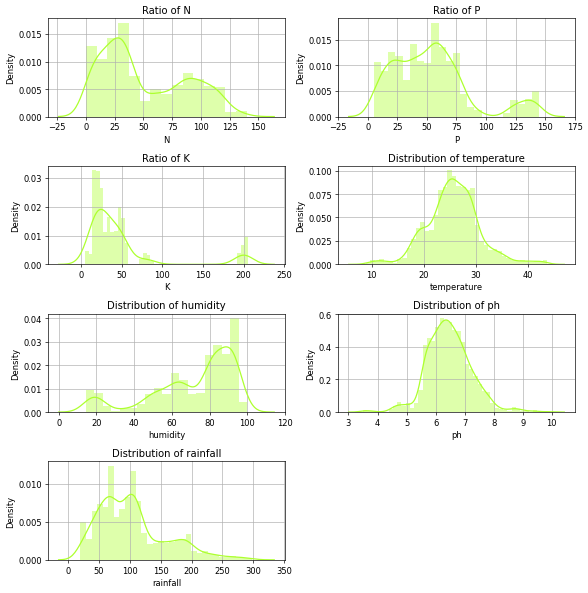

In [ ]:
# over all distribution

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['figure.dpi'] = 60

features = ['N', 'P', 'K', 'temperature',
			'humidity', 'ph', 'rainfall']

for i, feat in enumerate(features):
	plt.subplot(4, 2, i + 1)
	sns.distplot(data[feat], color='greenyellow')
	if i < 3:
		plt.title(f'Ratio of {feat}', fontsize=12)
	else:
		plt.title(f'Distribution of {feat}', fontsize=12)
	plt.tight_layout()
	plt.grid()

This code creates distribution plots (histograms with KDE curves-KDE stands for Kernel Density Estimation.It's a non-parametric way to estimate the probability density function of a continuous variable) — essentially, it helps you visualize the distribution (shape) of your data more smoothly than a histogram.) for all the input features in your crop dataset using Matplotlib and Seaborn, which helps visualize how the data is spread for each feature (like Nitrogen, Phosphorus, Temperature, etc.).

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['figure.dpi'] = 60

Sets the size of the whole plot window (10x10 inches) and resolution (60 dots per inch).

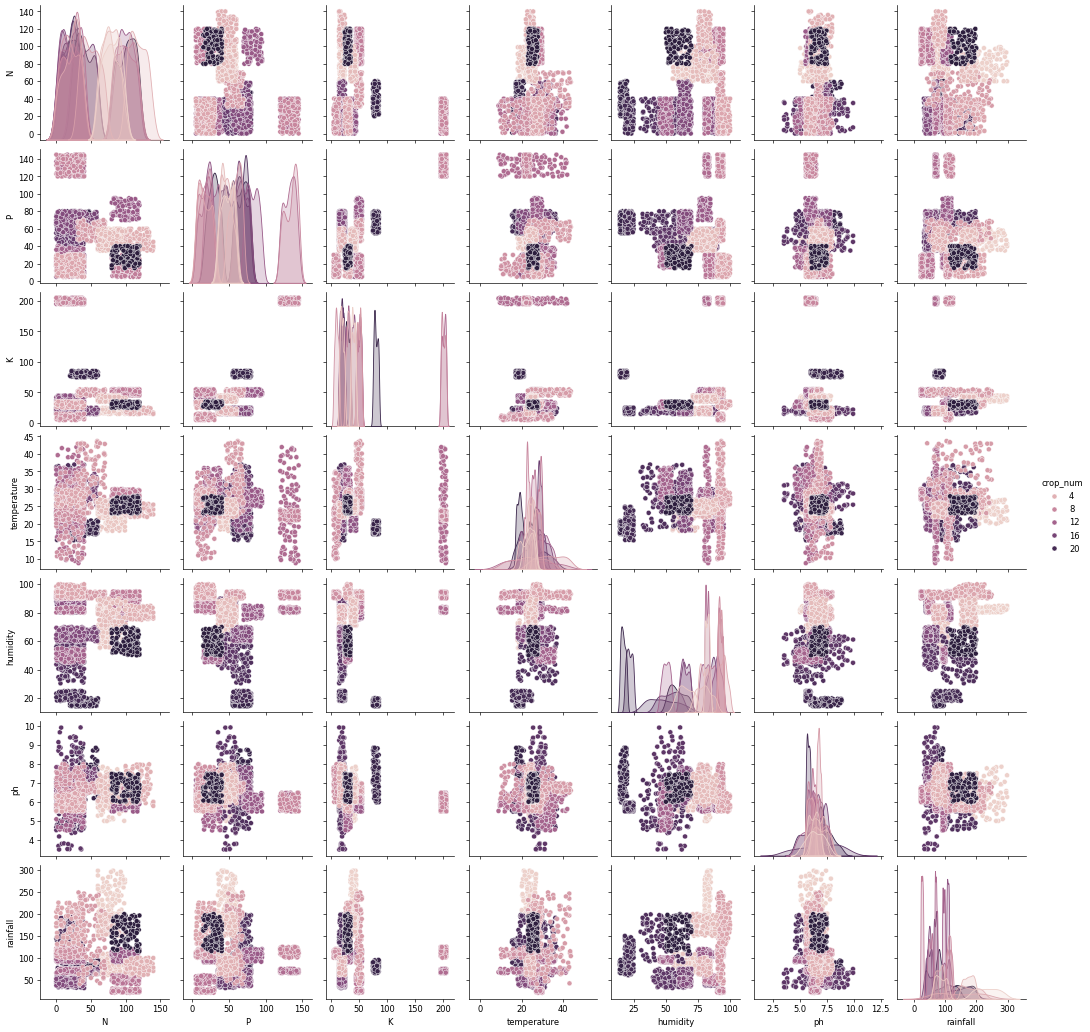

In [ ]:
sns.pairplot(data, hue='crop_num')

**sns.pairplot(data, hue='crop_num')**
is used to visualize pairwise relationships between features in your dataset using Seaborn’s pairplot(), where:

data: is your DataFrame containing features like 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', and 'crop_num'.

hue='crop_num': uses the column 'crop_num' (numerical encoding of crop labels) to color the data points in the plots. Each crop class will have a unique color.

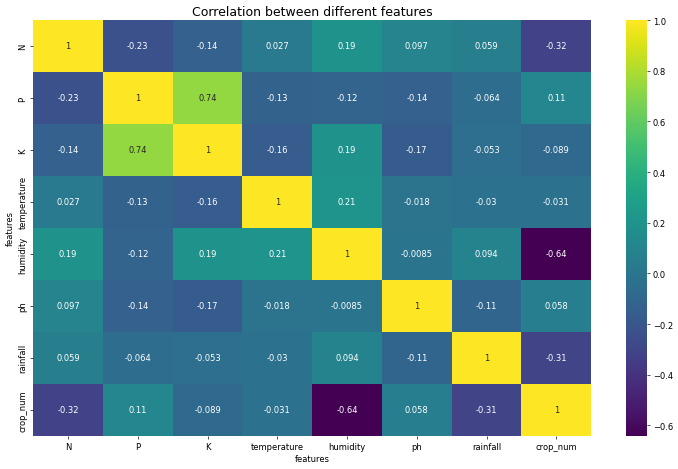

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(data.corr(),
			annot=True,
			cmap='viridis')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features',
		fontsize=15,
		c='black')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(15, 9))
Creates a figure and one subplot (ax) with a large size for better readability.
sns.heatmap(data.corr(), annot=True, cmap='viridis')
data.corr(): Computes the correlation matrix between all numerical features.

annot=True: Displays the correlation coefficients (numbers) inside the heatmap cells.

cmap='viridis': Applies a color scheme to the heatmap (dark blue to yellow gradient).

.....................................................................

 Example Insight:
A correlation of 1: Perfect positive correlation (e.g., feature with itself).

A correlation of -1: Perfect negative correlation.

A correlation near 0: No linear relationship.

Color (cmap='viridis'):
In the viridis colormap:

Dark purple/blue → low or negative correlation

Green/yellow → high positive correlation

............................................................................

Perceptually Uniform Sequential Colormaps (good for intensity or values):
'viridis' (default in many plots — blue → green → yellow)

'plasma' (dark purple → yellow)

'inferno' (black → red → yellow)

'magma' (black → purple → white)

'cividis' (blue → yellow; good for colorblind users)




In [ ]:
# Put all the input variables into features vector
features = data[['N', 'P', 'K', 'temperature',
				'humidity', 'ph', 'rainfall']]

# Put all the output into labels array
labels = data['crop_num']

# **Train Test Split**


In [ ]:
X = data.drop(['crop_num'],axis=1)
y = data['crop_num']

In [ ]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [ ]:
y

,crop_num
0,1
1,1
2,1
3,1
4,1
...,...
2195,22
2196,22
2197,22
2198,22


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


# **Scale the features using MinMaxScaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

This code applies Min-Max Normalization to your training and test feature sets so that all features are scaled between 0 and 1, which helps many machine learning algorithms perform better.

**Why Scaling?**

Algorithms like K-Nearest Neighbors, SVM, and Neural Networks are sensitive to feature scales.

Without scaling, features with large values can dominate distance calculations or optimization.



In [ ]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

# **Training Models**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, model in models.items():
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)

    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")
    print("Confusion matrix : ",confusion_matrix(y_test,ypred))
    print("==========================================================")


Logistic Regression  with accuracy : 0.9181818181818182
Confusion matrix :  [[16  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  

In [ ]:
# finally selected randomforest model based on accuracy

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
accuracy_score(y_test,ypred)

0.9931818181818182

In [ ]:
# or gausianjb
gnb = GaussianNB()
gnb.fit(X_train,y_train)
ypred = gnb.predict(X_test)
accuracy_score(y_test,ypred)

0.9954545454545455

# **Predictive System**

In [ ]:
def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    transformed_features = ms.fit_transform(features)
    prediction = rfc.predict(transformed_features)
    print(prediction)
    return prediction[0]

In [ ]:
# new inputs


N = 40
P = 50
k = 50
temperature = 40.0
humidity = 20
ph = 100
rainfall = 100

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict in crop_dict:
    crop = crop_dict[predict]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

[9]
Muskmelon is a best crop to be cultivated 


In [ ]:
# new inputs 2


N = 100
P = 90
k = 100
temperature = 50.0
humidity = 90.0
ph = 100
rainfall = 202.0

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict in crop_dict:
    crop = crop_dict[predict]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

[9]
Muskmelon is a best crop to be cultivated 


In [ ]:
from sklearn import metrics

# Get predictions for all test data
predict = model.predict(X_test)

# Print classification report
print(metrics.classification_report(y_test, predict))


              precision    recall  f1-score   support

           1       0.83      0.79      0.81        19
           2       1.00      0.81      0.89        21
           3       0.83      0.83      0.83        23
           4       0.89      0.94      0.91        17
           5       0.96      0.96      0.96        27
           6       0.95      0.87      0.91        23
           7       0.83      0.71      0.77        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        17
          10       0.95      1.00      0.97        19
          11       1.00      1.00      1.00        14
          12       0.94      0.84      0.89        19
          13       1.00      1.00      1.00        21
          14       0.84      0.91      0.88        23
          15       0.55      1.00      0.71        11
          16       0.69      0.90      0.78        20
          17       1.00      1.00      1.00        19
          18       0.95    

# Metrics Explained:

Precision = TP / (TP + FP)
→ Out of predicted positives, how many were actually correct?

Recall = TP / (TP + FN)
→ Out of actual positives, how many did the model catch?

F1-score = Harmonic mean of precision and recall
→ Useful when there’s class imbalance.

Support = Number of actual instances for each class.

In [ ]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))
pickle.dump(ms,open('minmaxscaler.pkl','wb'))

Saves the trained model (rfc, e.g., RandomForestClassifier) to a file named model.pkl.

pickle.dump(rfc, open('model.pkl', 'wb'))



Saves the MinMaxScaler instance used to scale your data into minmaxscaler.pkl.

pickle.dump(ms, open('minmaxscaler.pkl', 'wb'))

# Why It's Useful:

Lets you reuse the model and scaler without retraining.

You can deploy the model in a web app, API, or GUI by loading them using pickle.load().


